In [66]:
# quandl data 
import quandl

# analysis packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100


In [67]:
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

quandl.ApiConfig.api_key = config['API']['api_key']

In [68]:
df_ust_rates = quandl.get("USTREASURY/YIELD")

In [69]:
df_ust_rates.columns

Index(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR',
       '10 YR', '20 YR', '30 YR'],
      dtype='object')

In [70]:
# analyzing only last 3 years of data
df_ust_rates = df_ust_rates.tail(3 * 250)

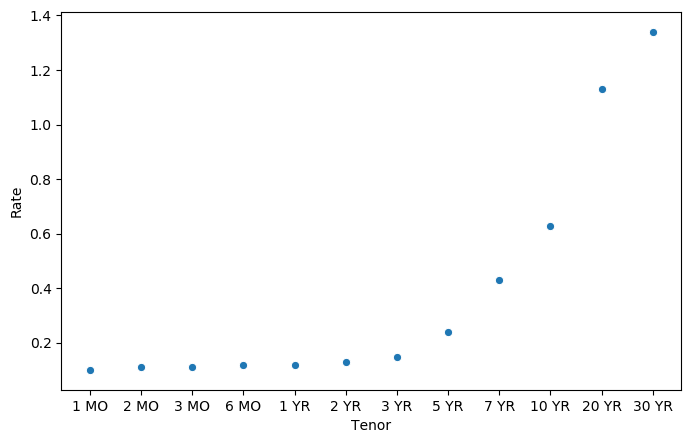

In [71]:
# today's rates
fig = sns.scatterplot(x = 'variable', y = 'value', data = pd.melt(df_ust_rates.tail(1)))
fig.set(xlabel = 'Tenor', ylabel = 'Rate')
fig

In [72]:
# 2 and 10 spread
df_ust_rates['SPREAD'] = df_ust_rates['10 YR'] - df_ust_rates['2 YR']
df_ust_rates.reset_index(inplace = True)
df_ust_rates.tail(5)

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,SPREAD
745,2020-08-28,0.09,0.09,0.10,0.11,0.12,0.14,0.16,0.28,0.51,0.74,1.29,1.52,0.60
746,2020-08-31,0.08,0.10,0.11,0.13,0.12,0.14,0.15,0.28,0.50,0.72,1.26,1.49,0.58
747,2020-09-01,0.09,0.11,0.12,0.13,0.12,0.13,0.14,0.26,0.46,0.68,1.20,1.43,0.55
748,2020-09-02,0.10,0.10,0.12,0.12,0.13,0.14,0.16,0.26,0.45,0.66,1.16,1.38,0.52
749,2020-09-03,0.10,0.11,0.11,0.12,0.12,0.13,0.15,0.24,0.43,0.63,1.13,1.34,0.50


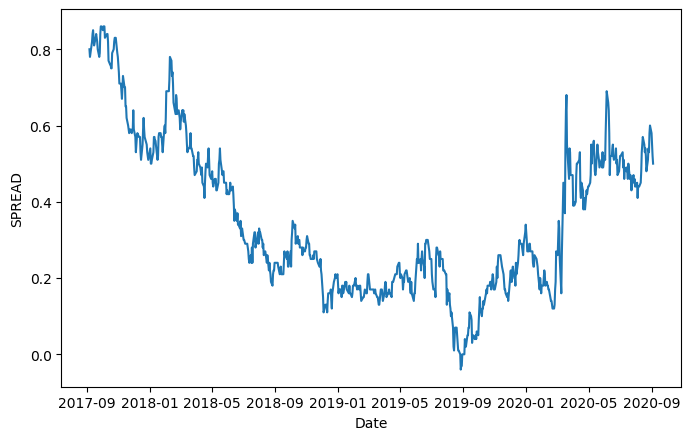

In [73]:
# one year spread
sns.lineplot(x = 'Date', y = 'SPREAD', data = df_ust_rates)

In [74]:
df_ust_rates.dtypes

Date      datetime64[ns]
1 MO             float64
2 MO             float64
3 MO             float64
6 MO             float64
1 YR             float64
2 YR             float64
3 YR             float64
5 YR             float64
7 YR             float64
10 YR            float64
20 YR            float64
30 YR            float64
SPREAD           float64
dtype: object

641    0.39
642    0.40
643    0.39
644    0.40
645    0.47
       ... 
745    0.60
746    0.58
747    0.55
748    0.52
749    0.50
Name: SPREAD, Length: 109, dtype: float64
0.5


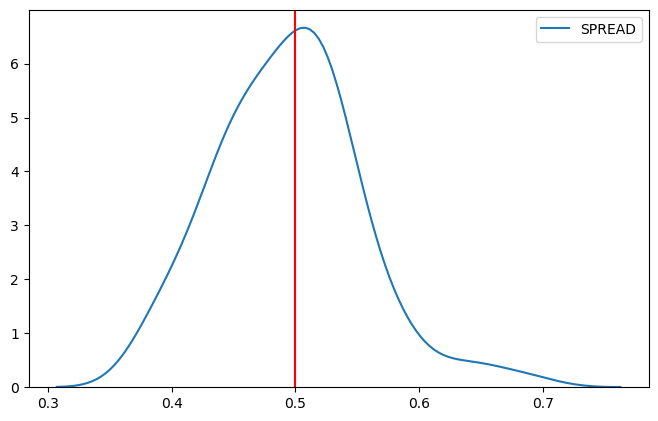

In [76]:
# setting date
post_dt = pd.to_datetime('2020-04-01')
ax = sns.kdeplot(df_ust_rates[df_ust_rates['Date'] >= post_dt]['SPREAD'])
ax.axvline(df_ust_rates.iloc[-1, -1], color='red', label='TODAYLEVEL')